!pip3 install pandas<br>
!pip3 install numpy<br>
!pip3 install matplotlib<br>
!pip3 install statsmodels<br>

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

연속형 임의의 데이터 생성

In [2]:
np.random.seed(0)

Temperature = np.random.normal(30,3,100)
IceAmericano = Temperature + np.random.normal(100,8,100)
InteriorPrice = np.random.normal(60,20,100)

데이터 프레임 형태로 2개 데이터 합치기<br>

In [3]:
Data = pd.DataFrame({
    'Temp':Temperature,
    'Sales':IceAmericano,
    'InteriorPrice':InteriorPrice
})

In [4]:
Data.describe()

,Temp,Sales,InteriorPrice
count,100.000000,100.000000,100.000000
mean,30.179424,130.835528,58.815355
std,3.038879,9.170076,19.135973
min,22.341031,107.604044,4.548145
25%,28.068430,123.580449,48.068709
50%,30.282288,129.709430,58.492823
75%,32.211232,138.323847,70.773134
max,36.809264,150.357363,106.078334


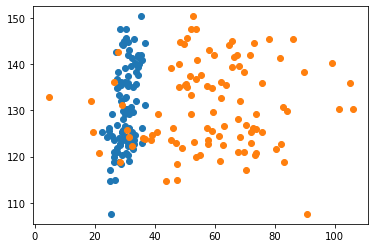

In [10]:
plt.plot(Data['Temp'], Data['Sales'], 'o')
plt.plot(Data['InteriorPrice'], Data['Sales'], 'o')
plt.show()

선형회귀 모델, 딥러닝 framework (keras)로 만들기

In [39]:
model = Sequential()
model.add(Dense(5, activation = 'linear', input_shape = (2,)))
model.add(Dense(5, activation = 'linear'))
model.add(Dense(1, activation = 'linear'))

model.compile(loss='mse',optimizer=Adam(learning_rate=0.5))

In [45]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 5)                 15        
                                                                 
 dense_16 (Dense)            (None, 5)                 30        
                                                                 
 dense_17 (Dense)            (None, 1)                 6         
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________


In [42]:
Train_x = Data[['Temp', 'InteriorPrice']]
Train_y = Data[['Sales']]

In [43]:
hist = model.fit(x = Train_x, y = Train_y, epochs=50, shuffle=True)

Epoch 1/50
4/4 [==============================] - 0s 1ms/step - loss: 186449.2188
Epoch 2/50
4/4 [==============================] - 0s 1ms/step - loss: 35761.4219
Epoch 3/50
4/4 [==============================] - 0s 2ms/step - loss: 83841.5469
Epoch 4/50
4/4 [==============================] - 0s 2ms/step - loss: 41853.0547
Epoch 5/50
4/4 [==============================] - 0s 2ms/step - loss: 20598.2949
Epoch 6/50
4/4 [==============================] - 0s 1ms/step - loss: 4397.7505
Epoch 7/50
4/4 [==============================] - 0s 2ms/step - loss: 3351.6743
Epoch 8/50
4/4 [==============================] - 0s 2ms/step - loss: 8213.0039
Epoch 9/50
4/4 [==============================] - 0s 1ms/step - loss: 3954.7095
Epoch 10/50
4/4 [==============================] - 0s 2ms/step - loss: 1085.8673
Epoch 11/50
4/4 [==============================] - 0s 1ms/step - loss: 2356.3396
Epoch 12/50
4/4 [==============================] - 0s 1ms/step - loss: 788.1568
Epoch 13/50
4/4 [===============

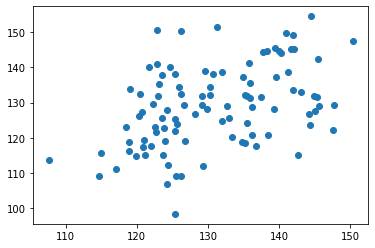

In [44]:
plt.plot(Data['Sales'], model.predict(Data[['Temp', 'InteriorPrice']]), 'o')
plt.show()

In [54]:
pred = model.predict(Data[['Temp', 'InteriorPrice']]).reshape(100,)


In [56]:
pd.DataFrame({'Label':Data['Sales'], 'Pred':pred}).corr()

,Label,Pred
Label,1.000000,0.434724
Pred,0.434724,1.000000
